In [2]:
import os
import torch
import pandas as pd
import matplotlib.pyplot as plt


In [4]:
# Define the directory containing the .pt files
directory =  '/pscratch/sd/b/bartolds/speculative-diffusion/nanoGPT/llama_31_vocab/'


# Initialize a list to store the data
data = []

# Loop through each file in the directory
for filename in os.listdir(directory):
    if filename.endswith(".pt"):
        # Load the .pt file
        file_path = os.path.join(directory, filename)
        checkpoint = torch.load(file_path)
        
        # Extract values for iter_num, total_perplexity, and best_val_loss
        iter_num = checkpoint.get('iter_num')
        total_perplexity = checkpoint.get('total_perplexity')
        best_val_loss = checkpoint.get('best_val_loss')
        
        # Append the data to the list
        if iter_num is not None and best_val_loss is not None:
            data.append({
                'iter_num': iter_num,
                'total_perplexity': total_perplexity,
                'best_val_loss': best_val_loss
            })

# Convert the data to a DataFrame
df = pd.DataFrame(data)

# Sort the DataFrame by iter_num
df = df.sort_values(by='iter_num')


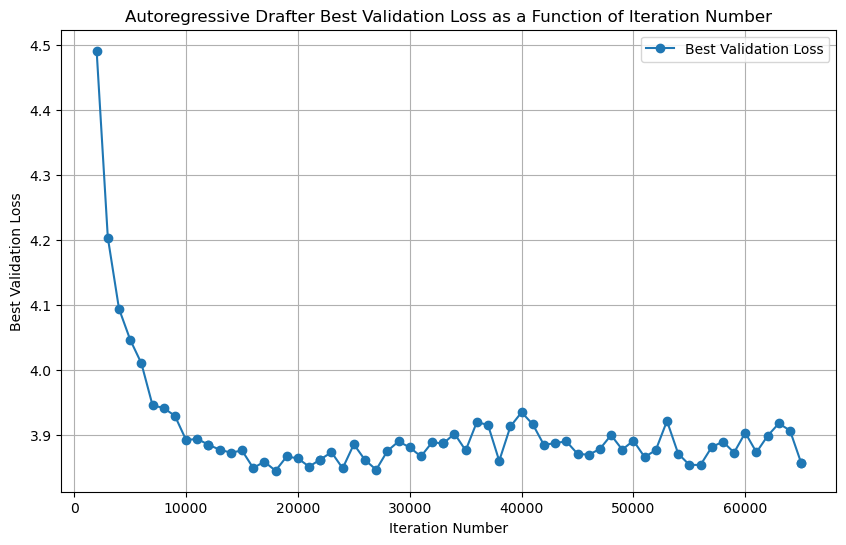

In [7]:
# Plot best_val_loss as a function of iter_num
plt.figure(figsize=(10, 6))
plt.plot(df['iter_num'], df['best_val_loss'], marker='o', label='Best Validation Loss')
plt.xlabel('Iteration Number')
plt.ylabel('Best Validation Loss')
plt.title('Autoregressive Drafter Best Validation Loss as a Function of Iteration Number')
plt.legend()
plt.grid(True)

# Display the plot
plt.show()

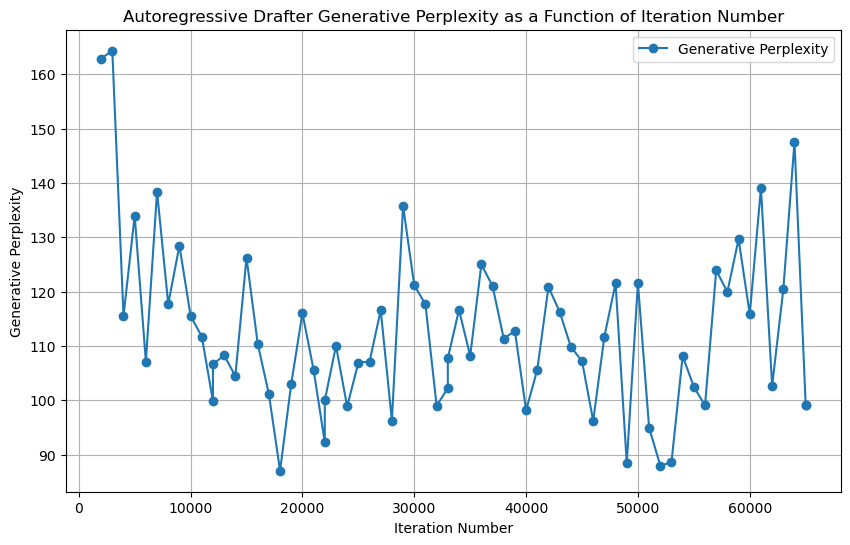

In [6]:
# Plot best_val_loss as a function of iter_num
plt.figure(figsize=(10, 6))
plt.plot(df['iter_num'], df['total_perplexity'], marker='o', label='Generative Perplexity')
plt.xlabel('Iteration Number')
plt.ylabel('Generative Perplexity')
plt.title('Autoregressive Drafter Generative Perplexity as a Function of Iteration Number')
plt.legend()
plt.grid(True)

# Display the plot
plt.show()

In [8]:
df.query('total_perplexity<90')

,iter_num,total_perplexity,best_val_loss
54,18000,"tensor(87.0423, device='cuda:0')",tensor(3.8455)
22,49000,"tensor(88.4447, device='cuda:0')",tensor(3.8780)
15,52000,"tensor(87.9854, device='cuda:0')",tensor(3.8772)
41,53000,"tensor(88.5986, device='cuda:0')",tensor(3.9221)
